### Compute iceberg PDFs for use as spatial-temporal templates for distributing solid freshwater from land in climate models
- based on the number of icebergs per gridbox
- next version should be based on the melt fields (since small and giant icebergs melt differently)

T. Rackow, AWI, January 2019

In [122]:
from netCDF4 import Dataset, MFDataset

##%matplotlib inline
%matplotlib nbagg

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [123]:
ls

FESOM_trajectories_weekly.nc
PDF_0_simplecount_sector(-60, -30).nc
PDF_1_simplecount_sector(-30, -10).nc
PDF_2_simplecount_sector(-10, 35).nc
PDF_3_simplecount_sector(35, 70).nc
PDF_4_simplecount_sector(70, 105).nc
PDF_5_simplecount_sector(105, 158).nc
PDF_6_simplecount_sector[158, -158].nc
PDF_7_simplecount_sector(-158, -100).nc
PDF_8_simplecount_sector(-100, -65).nc
PDF_9_simplecount_sector(-65, -50).nc
buoys_track_855799_shifttime.nc
compute_iceberg_PDFs.ipynb
compute_iceberg_PDFs_cleanup.ipynb
compute_iceberg_PDFs_meltfield.ipynb
compute_iceberg_PDFs_sectorsLONLAT.ipynb
firstsector.nc


In [124]:
trajectory_file = 'FESOM_trajectories_weekly.nc'
fl = MFDataset(trajectory_file)

In [125]:
fl

<class 'netCDF4._netCDF4.MFDataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.4
    history: Thu Aug 10 18:08:10 2017: cdo seltimestep,1/16436/28 FESOM_trajectories.nc FESOM_trajectories_weekly.nc
Thu Aug 10 18:04:32 2017: cdo mergetime trajectories_1997.nc trajectories_1998.nc trajectories_1999.nc trajectories_2000.nc trajectories_2001.nc trajectories_2002.nc trajectories_2003.nc trajectories_2004.nc trajectories_2005.nc trajectories_2006.nc trajectories_2007.nc trajectories_2008.nc FESOM_trajectories.nc
Thu Aug 10 18:00:50 2017: cdo selname,pos_lon_deg,pos_lat_deg,length ../PAP009/PAP009.2008.icb.nc trajectories_2008.nc
Wed Oct 14 18:15:26 2015: cdo selyear,2008 buoys_track_855799_shifttime.nc PAP009.2008.icb.nc
Wed Oct 14 16:54:44 2015: cdo shifttime,-1second ./backup/buoys_track_855799.nc buoys_track_855799_shifttime.nc
    CDO: Climate Data Operators version 1.7.0 (http

In [126]:
fl.variables['pos_lon_deg']

<class 'netCDF4._netCDF4._Variable'>
float64 pos_lon_deg('time', 'x')
    long_name: longitude of buoy/iceberg position in degree
    units: degrees_east
    description: (un)rotated according to setting of l_geo_out in iceberg module
unlimited dimensions = ('time',)
current size = (587, 6912)

#### plot all trajectories

<IPython.core.display.Javascript object>


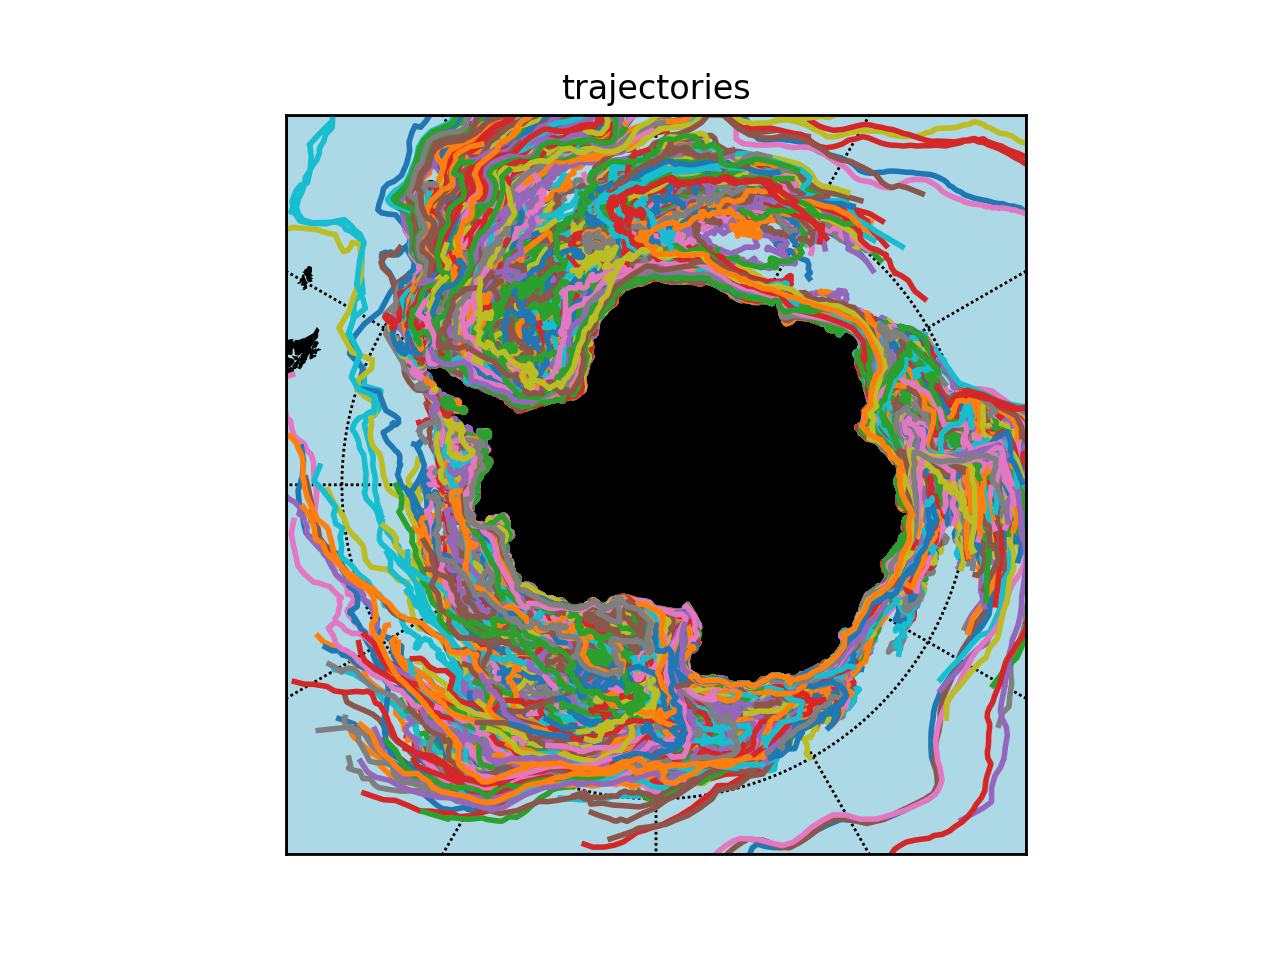

In [13]:
fig1, ax1 = plt.subplots()
map = Basemap(projection='spstere',lon_0=-180,boundinglat=-55.,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='black',lake_color='blue')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='lightblue')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

for idx in np.arange(0,6912,1):
    # compute native map projection coordinates of lat/lon grid.
    lon_deg=np.trim_zeros(fl.variables['pos_lon_deg'][:,idx], trim='backfisch')
    lat_deg=np.trim_zeros(fl.variables['pos_lat_deg'][:,idx], trim='backfisch')
    x, y = map(lon_deg, lat_deg)
    map.plot(x, y, '-', markersize=3, linewidth=2) 

plt.title('trajectories')
plt.show()

#### find initial iceberg positions

In [127]:
initiallons=fl.variables['pos_lon_deg'][0,:]
initiallats=fl.variables['pos_lat_deg'][0,:]
initiallons.min(), initiallons.max()

(-165.91965944283172, 169.66375868986617)

<IPython.core.display.Javascript object>


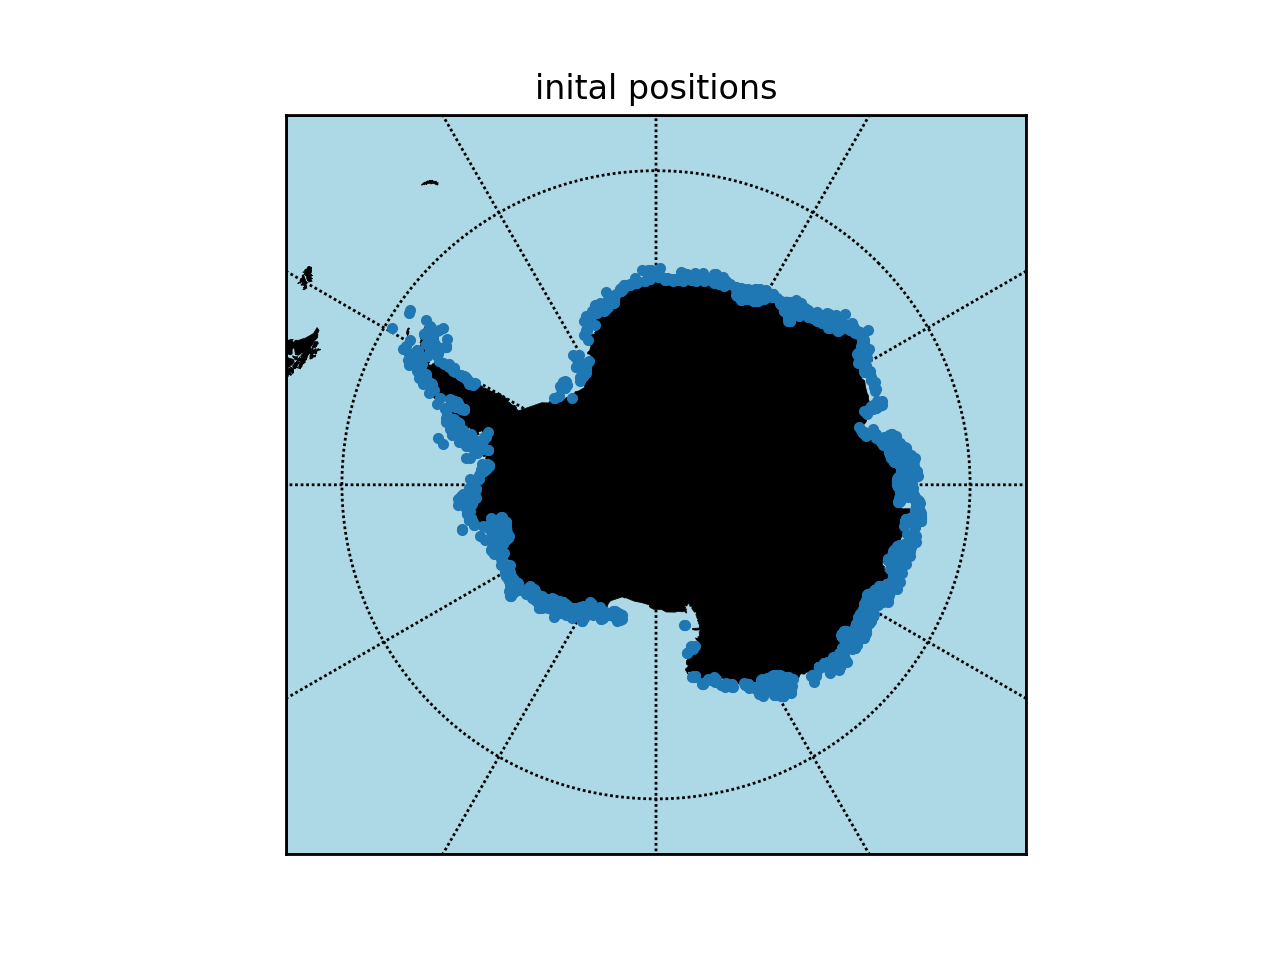

In [128]:
fig1, ax1 = plt.subplots()
map = Basemap(projection='spstere',lon_0=-180,boundinglat=-55.,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='black',lake_color='blue')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='lightblue')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

# compute native map projection coordinates of lat/lon grid.
x, y = map(initiallons, initiallats)
map.plot(x, y, 'o', markersize=3, linewidth=2) 

plt.title('inital positions')
plt.show()

#### let's define a sector

In [157]:
sectorlons=[-60,60]  # [0.,30.] # -10, 60
sectorlats=[-90,-20] # 

In [158]:
def find_IDX_forsector(sectorlons, sectorlats, initiallons, initiallats):
    IDXsector1=np.logical_and(initiallons<sectorlons[1], initiallons>=sectorlons[0])
    IDXsector2=np.logical_and(initiallats>sectorlats[0], initiallats<sectorlats[1])
    IDXsector=np.where(np.logical_and(IDXsector1,IDXsector2))
    
    return np.ndarray.flatten(np.array(IDXsector))

In [159]:
IDXsector=find_IDX_forsector(sectorlons=sectorlons, sectorlats=sectorlats, initiallons=initiallons, initiallats=initiallats)

#### plot trajectories originating in this sector

<IPython.core.display.Javascript object>


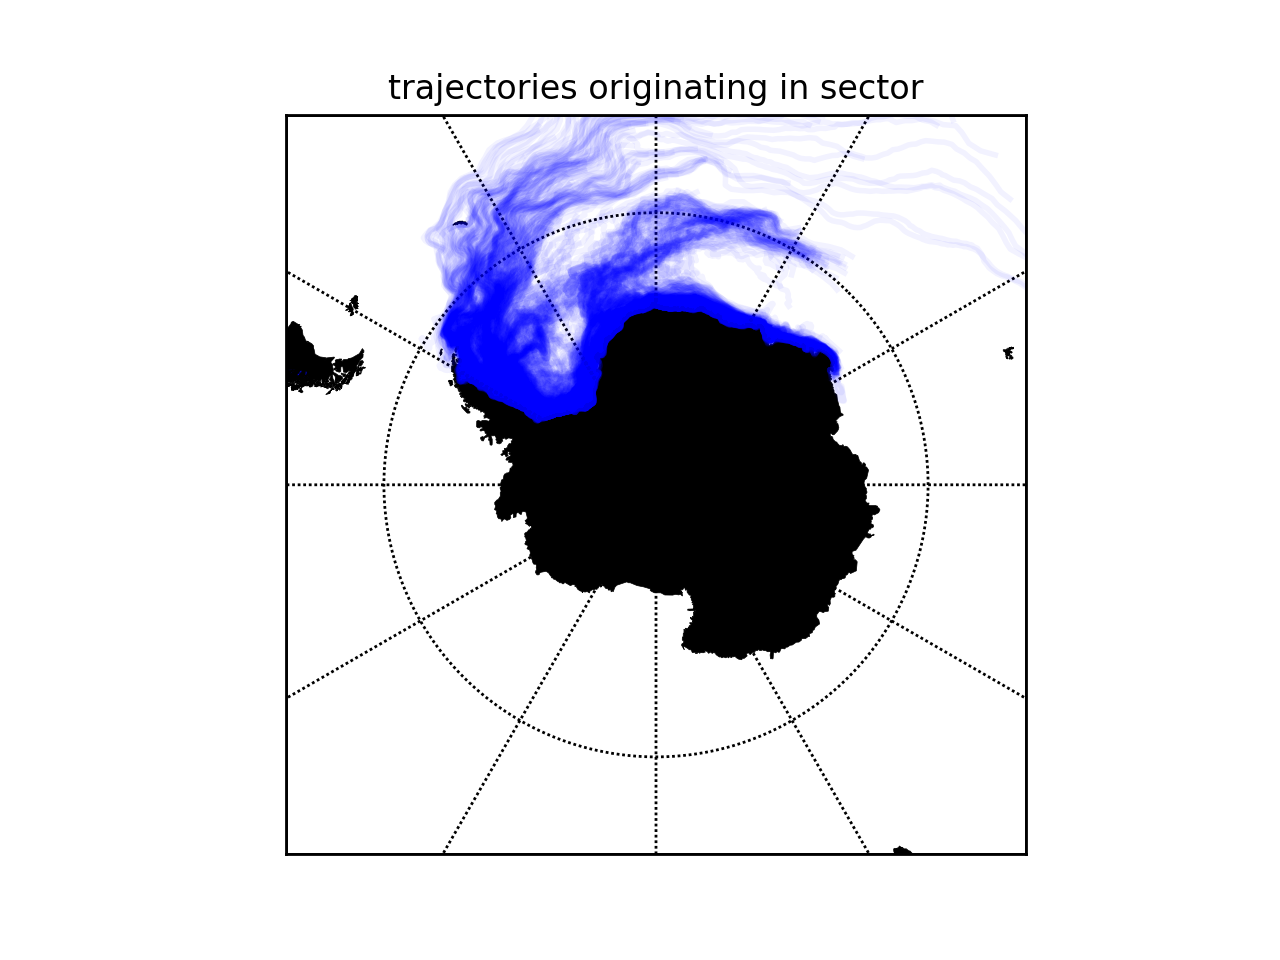

In [160]:
fig1, ax1 = plt.subplots()
map = Basemap(projection='spstere',lon_0=-180,boundinglat=-50.,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='black',lake_color='blue')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='white')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

for idx in IDXsector:
    # compute native map projection coordinates of lat/lon grid.
    lon_deg=np.trim_zeros(fl.variables['pos_lon_deg'][:,idx], trim='backfisch')
    lat_deg=np.trim_zeros(fl.variables['pos_lat_deg'][:,idx], trim='backfisch')
    x, y = map(lon_deg, lat_deg)
    map.plot(x, y, '-', markersize=3, linewidth=2, alpha=0.05, color='blue') 

plt.title('trajectories originating in sector')
plt.show()

#### define gridded field (0.5°, 0.25° will also work)

In [161]:
# which resolution?
res=1 #1 # 1: 1 deg x 1 deg regular mesh

western_lon=-180.0*res
eastern_lon=abs(western_lon)-1
xgv=np.arange(western_lon, eastern_lon+1, 1) #western_lon:1:eastern_lon
northern_lat=-38.0*res 
southern_lat=-80.0*res
ygv=np.arange(northern_lat, southern_lat-1, -1) #northern_lat:-1:southern_lat
        
[X,Y] = np.meshgrid(xgv,ygv)

outLON=xgv.size
outLAT=ygv.size

In [162]:
def aggregate(pos_lon, pos_lat, res, outLON, outLAT):
    
    # set time
    num_records,num_ib=pos_lon.shape
    time=np.tile(np.arange(1,num_records+1,1), (num_ib, 1))
    # define T
    idT=np.floor(time)
    idT=idT.astype('int64')
    
    # find X
    idX=np.floor((pos_lon+180.)*res)+1  # matrix with range [1 ... 360] (or [1 ... 1440])
    idX=idX.astype('int64')
    
    # find Y
    pos_lat[pos_lat>-1.]=southern_lat/res;  # set (0,0) points (iceberg melted) to (0,-80) (land)

    idY=np.floor(abs(pos_lat)*res+northern_lat)+1; # matrix with range [1 ... 43] (or [1 ... 180])
    idY=idY.astype('int64')
    
    # create linear index for accumarray
    # (idX,idY,idT) -> coord (linear index)
    coord = idX.T + (idY.T-1)*outLON + (idT-1)*outLAT*outLON # row-wise 
    coord = np.reshape(coord, (coord.size,1))
    #coord.min(), coord.max()
    
    # extend coord to cover the full coord range;
    coord = np.append(coord, outLON*outLAT*num_records-1)
    coord = np.insert(coord, 0, 0)
    #coord.min(), coord.max(), 1, outLON*outLAT*num_records
    
    # Fast solution to MATLAB's accumarray in numpy.
    # https://stackoverflow.com/questions/16856470/is-there-a-matlab-accumarray-equivalent-in-numpy
    # The accumarray accumulates the elements of an array which belong to the same index.
    a = np.ones((coord.size)) # could be meltfield later, now just counting [0, 1, ..., 1, 0]
    a[0]=0
    a[-1]=0
    accmap = coord.flatten() # linear index of all (X,Y,T)

    # do the counting
    result=np.bincount(accmap, weights=a)
    
    # reshape to (T,Y,X)
    result_reshape=np.reshape(result, (num_records, outLAT, outLON))
    result_reshape[:,outLAT-1,:]=0. # set land values to zero
    
    return result_reshape
    

#### select trajectories

In [163]:
#pos_lon=fl.variables['pos_lon_deg'][:,:] # all icebergs from all sectors
#pos_lat=fl.variables['pos_lat_deg'][:,:]
pos_lon=fl.variables['pos_lon_deg'][:,IDXsector]
pos_lat=fl.variables['pos_lat_deg'][:,IDXsector]

In [164]:
result=aggregate(pos_lon, pos_lat, res, outLON, outLAT)

<IPython.core.display.Javascript object>


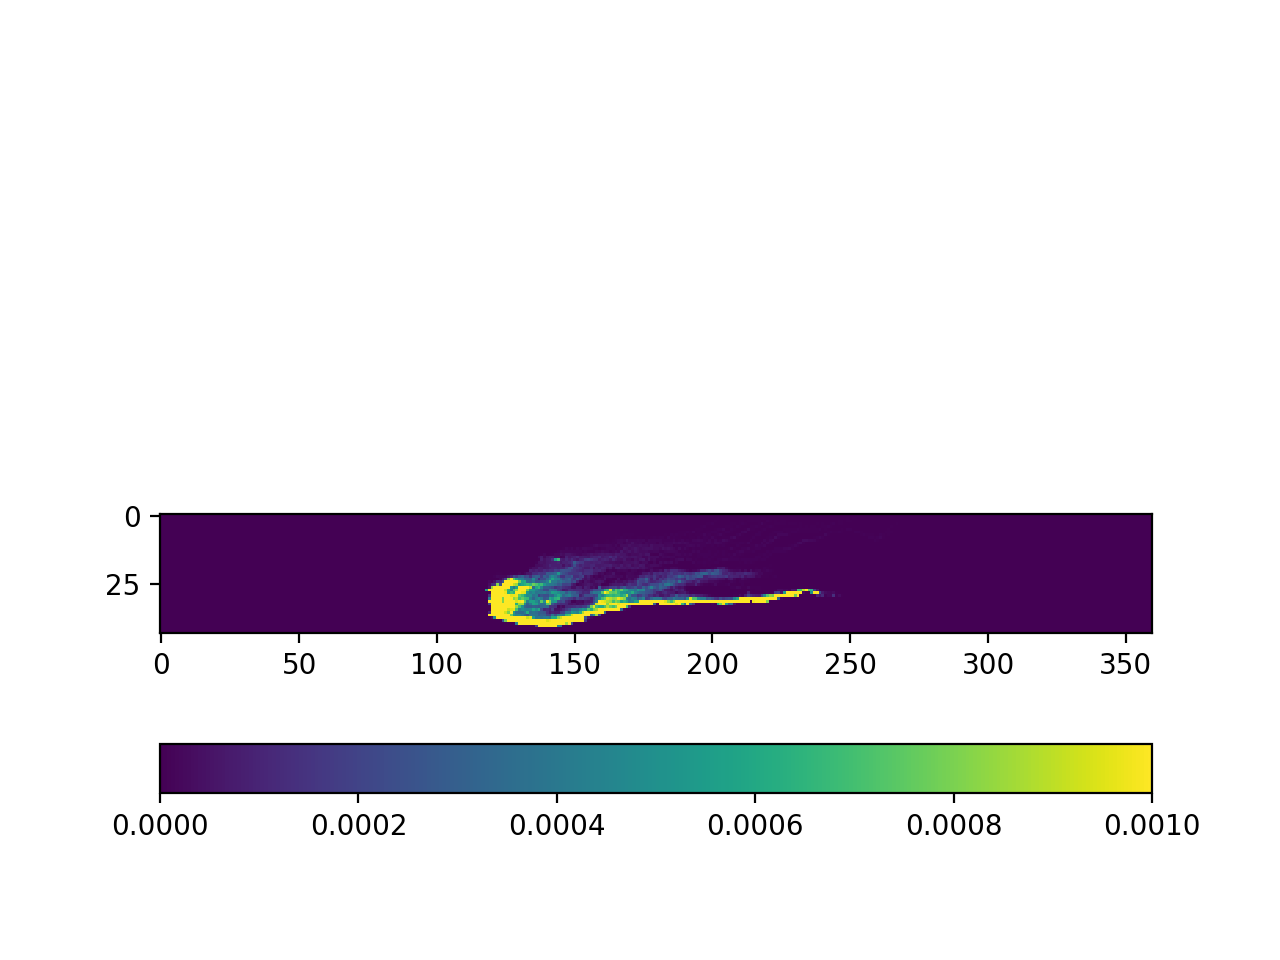

1.0000000000000002

In [165]:
# take the mean and normalize
pattern=np.mean(result[:,:,:], axis=0)
pattern=pattern/pattern.sum() # normalize

fig1, ax1 = plt.subplots()
plt.imshow(pattern)
plt.colorbar(orientation='horizontal')
plt.clim(0,0.001)
plt.show()

pattern.sum() # is 1.

<IPython.core.display.Javascript object>


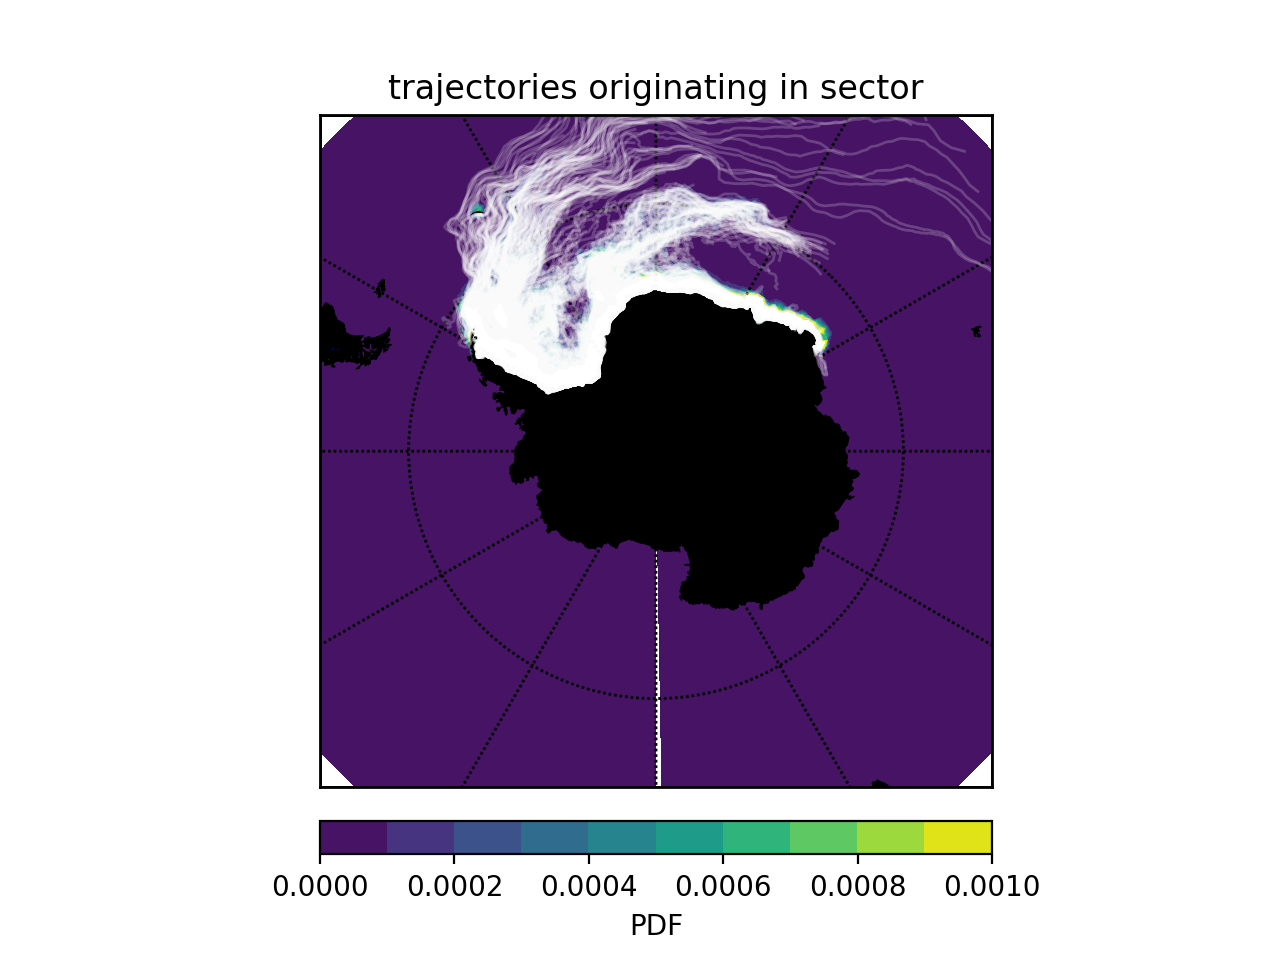

In [167]:
fig1, ax1 = plt.subplots()

plot_trajectories=True

map = Basemap(projection='spstere',lon_0=-180,boundinglat=-50.,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='black',lake_color='blue')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='white')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
    

#lons, lats = map.makegrid(outLON, outLAT)
x, y = map(X, Y) # compute map proj coordinates.
# draw filled contours.
clevs = np.array([0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.])*0.001
cs = map.contourf(x,y,pattern,clevs)
# add colorbar.
cbar = map.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('PDF')
#plt.clim(0,1)

if plot_trajectories:
    for idx in IDXsector:
        # compute native map projection coordinates of lat/lon grid.
        lon_deg=np.trim_zeros(fl.variables['pos_lon_deg'][:,idx], trim='backfisch')
        lat_deg=np.trim_zeros(fl.variables['pos_lat_deg'][:,idx], trim='backfisch')
        x, y = map(lon_deg, lat_deg)
        map.plot(x, y, '-', markersize=3, linewidth=1, alpha=0.2, color='w') 

plt.title('trajectories originating in sector')
plt.show()

#### write sector to netcdf file

In [168]:
def write_sector2netcdf(sector, pattern, xgv, ygv, filename):
    
    import time as t
    
    # open new netcdf file with write access
    outLAT=pattern.shape[0]
    outLON=pattern.shape[1]
    dataset = Dataset(filename, 'w', format='NETCDF4_CLASSIC')
    
    # define dimensions
    lat = dataset.createDimension('lat', outLAT)
    lon = dataset.createDimension('lon', outLON)
    time = dataset.createDimension('time', None)
    
    # create variables
    times = dataset.createVariable('time', np.float64, ('time',)) 
    longitudes = dataset.createVariable('lon', np.float32, ('lon',))
    latitudes = dataset.createVariable('lat', np.float32, ('lat',))
    pdf = dataset.createVariable('PDF', np.float32, ('time','lat','lon'))
    
    # variable attributes
    pdf.units = 'none'
    times.units = 'seconds since 0001-01-01 00:00:00'
    times.calendar = 'gregorian'
    longitudes.standard_name = 'longitude'
    longitudes.long_name = 'longitude'
    longitudes.units = 'degrees_east'
    longitudes.axis = 'X'
    latitudes.standard_name = 'latitude'
    latitudes.long_name = 'latitude'
    latitudes.units = 'degrees_north'
    latitudes.axis = 'Y'
    
    # global attributes
    dataset.description = 'PDF for sector '+str(sector) 
    dataset.history = 'Created ' + t.ctime(t.time()) 
    dataset.source = 'Thomas Rackow, Alfred Wegener Institute, Helmholtz Centre for Polar and Marine Research'
    
    # write data
    longitudes[:] = xgv
    latitudes[:] = ygv
    times[:] = 1
    pdf[0,:,:]=pattern
    
    # close data
    dataset.close()

In [169]:
write_sector2netcdf(sector=sectorlons, pattern=pattern, xgv=xgv, ygv=ygv, filename='firstsector.nc')

#### now compute patterns for all 10 sectors (based on simple counting)

In [170]:
# Copied from Christian's mail:

# Each region has boundaries defined by lon1, lon2, lat1 and lat2.
# For example the region 0 (ic=0) is following ranges:
# lon_range = [lon1[ic], lon2[ic]]
# lat_range = [lat1[ic], lat2[ic]]
# You may have to consider the special case for the Ross Ice Shelf,
# where the longitude boundaries crosses the 180degree-line. You
# could use the flag_jump_dateline to check, if the region crosses
# the 180degree-line.
#
# (c) Christian Rodehacke, AWI Bremerhaven, 2019-Jan-15

SectorID = np.array(range(0,10),dtype=int)

lon1 = np.array([-60, -30, -10, +35,  +70, +105, +158, -158, -100, -65])
lon2 = np.array([-30, -10, +35, +70, +105, +158, -158, -100,  -65, -50])

lat1 = np.zeros_like(lon1)-90
lat2 = np.zeros_like(lon1)-20   # Globally: +90

# special cases close to Antarctic Peninsula
lat2[0] = -74 ; lat1[1] = -74
lat1[8] = -74 ; lat1[9] = -74

flag_jump_dateline = np.zeros_like(lon1, dtype=bool)
flag_jump_dateline[6] = True

#### loop over the sectors

In [141]:
currentID=0

for sectorlons in zip(lon1,lon2):
    
    sectorlats=[lat1[currentID],lat2[currentID]]
    
    if flag_jump_dateline[currentID]:
        print 'Skip '+str(sectorlons)+str(sectorlats)
        currentID=currentID+1
        continue
    else:
        print str(sectorlons) + str(sectorlats)
    
    # find iceberg indices
    IDXsector=find_IDX_forsector(sectorlons=sectorlons, sectorlats=sectorlats, initiallons=initiallons, initiallats=initiallats)
    
    # select full trajectories originating in this sector
    pos_lon=fl.variables['pos_lon_deg'][:,IDXsector]
    pos_lat=fl.variables['pos_lat_deg'][:,IDXsector]
    
    # aggregate (simple counting)
    result=aggregate(pos_lon, pos_lat, res, outLON, outLAT)
    
    # take the mean and normalize
    pattern=np.mean(result[:,:,:], axis=0)
    pattern=pattern/pattern.sum() # normalize
    
    # write to netcdf
    write_sector2netcdf(sector=sectorlons, pattern=pattern, xgv=xgv, ygv=ygv, filename='PDF_'+str(currentID)+'_simplecount_sector'+str(sectorlons)+'.nc')
    
    # next sector
    currentID=currentID+1

(-60, -30)[-90, -74]
(-30, -10)[-74, -20]
(-10, 35)[-90, -20]
(35, 70)[-90, -20]
(70, 105)[-90, -20]
(105, 158)[-90, -20]
Skip (158, -158)[-90, -20]
(-158, -100)[-90, -20]
(-100, -65)[-74, -20]
(-65, -50)[-74, -20]


#### treat the special case, currentID=6

In [142]:
currentID=6
sectorlats=[lat1[currentID],lat2[currentID]]
sectorlons=[lon1[currentID],lon2[currentID]]
sectorlons, sectorlats

([158, -158], [-90, -20])

In [143]:
sector_E=[sectorlons[0],180]
sector_W=[-180, sectorlons[1]]
sector_E, sector_W

([158, 180], [-180, -158])

In [144]:
IDXsector_E=find_IDX_forsector(sectorlons=sector_E, sectorlats=sectorlats, initiallons=initiallons, initiallats=initiallats)
IDXsector_W=find_IDX_forsector(sectorlons=sector_W, sectorlats=sectorlats, initiallons=initiallons, initiallats=initiallats)
IDXsector=np.concatenate((IDXsector_W, IDXsector_E))
IDXsector

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
       6868, 6869, 6870, 6871, 6872, 6873, 6874, 6875, 6876, 6877, 6878,
       6879, 6880, 6881, 6882, 6883, 6884, 6885, 6886, 6887, 6888, 6889,
       6890, 6891, 6892, 6893, 6894, 6895, 6896, 6897, 6898, 6899, 6900,
       6901, 6902, 6903, 6904, 6905, 6906, 6907, 6908, 6909, 6910, 6911])

In [145]:
# select full trajectories originating in this sector
pos_lon=fl.variables['pos_lon_deg'][:,IDXsector]
pos_lat=fl.variables['pos_lat_deg'][:,IDXsector]
    
# aggregate (simple counting)
result=aggregate(pos_lon, pos_lat, res, outLON, outLAT)
    
# take the mean and normalize
pattern=np.mean(result[:,:,:], axis=0)
pattern=pattern/pattern.sum() # normalize
    
# write to netcdf
write_sector2netcdf(sector=sectorlons, pattern=pattern, xgv=xgv, ygv=ygv, filename='PDF_'+str(currentID)+'_simplecount_sector'+str(sectorlons)+'.nc')

<IPython.core.display.Javascript object>


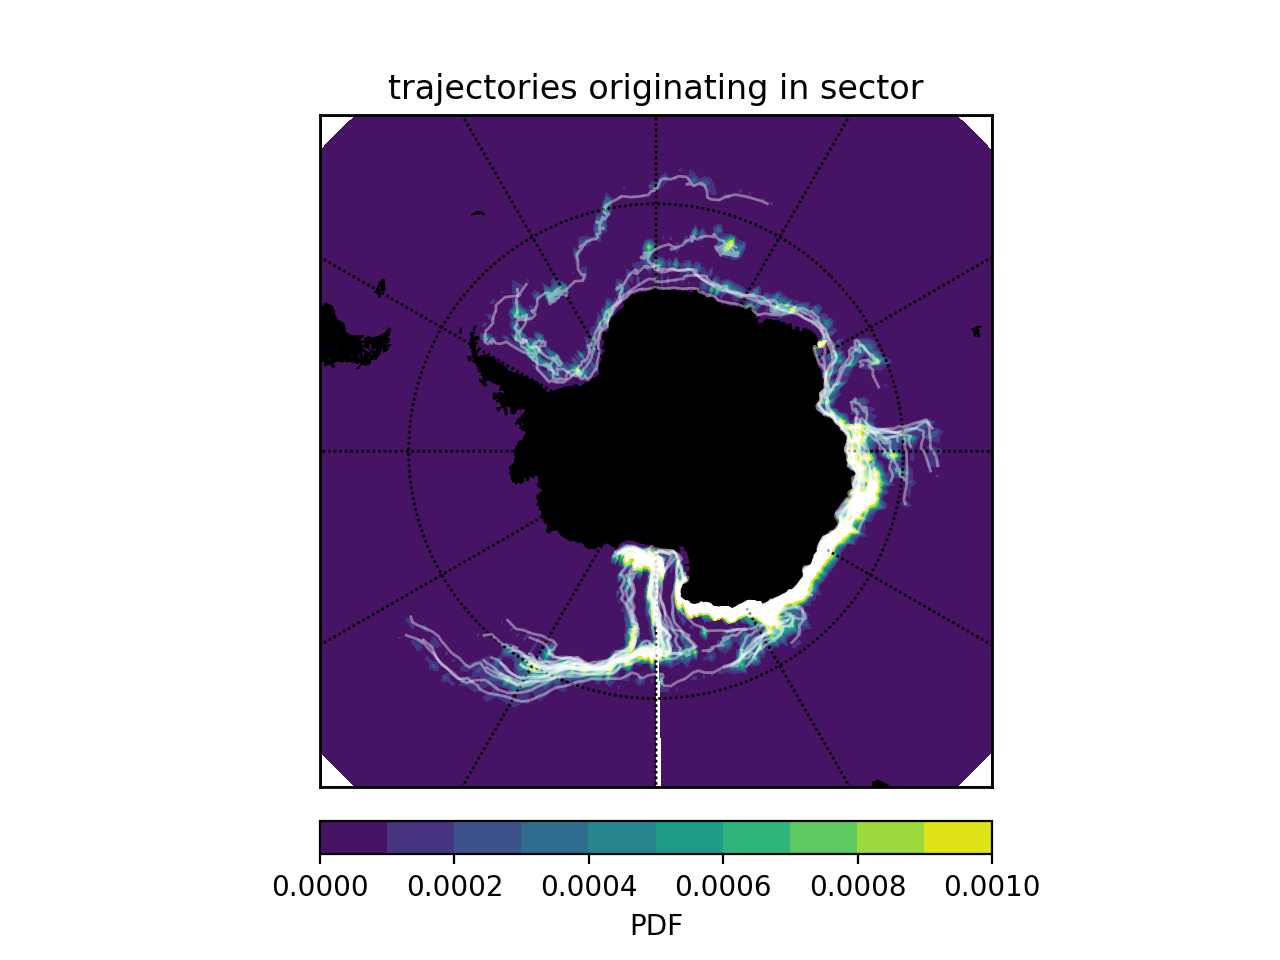

In [146]:
fig1, ax1 = plt.subplots()

plot_trajectories=True

map = Basemap(projection='spstere',lon_0=-180,boundinglat=-50.,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='black',lake_color='blue')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='white')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
    

#lons, lats = map.makegrid(outLON, outLAT)
x, y = map(X, Y) # compute map proj coordinates.
# draw filled contours.
clevs = np.array([0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.])*0.001
cs = map.contourf(x,y,pattern,clevs)
# add colorbar.
cbar = map.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('PDF')
#plt.clim(0,1)

if plot_trajectories:
    for idx in IDXsector:
        # compute native map projection coordinates of lat/lon grid.
        lon_deg=np.trim_zeros(fl.variables['pos_lon_deg'][:,idx], trim='backfisch')
        lat_deg=np.trim_zeros(fl.variables['pos_lat_deg'][:,idx], trim='backfisch')
        x, y = map(lon_deg, lat_deg)
        map.plot(x, y, '-', markersize=3, linewidth=1, alpha=0.4, color='w') 

plt.title('trajectories originating in sector')
plt.show()

#### check patterns with CDO (sum should be 1)

In [147]:
!cdo -s output -fldsum PDF_0_simplecount_sector\(-60,\ -30\).nc

            1


In [148]:
!cdo -s output -fldsum PDF_1_simplecount_sector\(-30,\ -10\).nc

            1


In [149]:
!cdo -s output -fldsum PDF_2_simplecount_sector\(-10,\ 35\).nc

            1


In [150]:
!cdo -s output -fldsum PDF_3_simplecount_sector\(35,\ 70\).nc

            1


In [151]:
!cdo -s output -fldsum PDF_4_simplecount_sector\(70,\ 105\).nc

            1


In [152]:
!cdo -s output -fldsum PDF_5_simplecount_sector\(105,\ 158\).nc

            1


In [153]:
!cdo -s output -fldsum PDF_6_simplecount_sector\[158,\ -158\].nc

            1


In [154]:
!cdo -s output -fldsum PDF_7_simplecount_sector\(-158,\ -100\).nc

            1


In [155]:
!cdo -s output -fldsum PDF_8_simplecount_sector\(-100,\ -65\).nc

            1


In [156]:
!cdo -s output -fldsum PDF_9_simplecount_sector\(-65,\ -50\).nc

            1
